In [1]:
# imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import nltk
import re
import contractions
import unidecode
# To plot visualizations inline with the notebook
%matplotlib inline

In [2]:
#read data
df= pd.read_csv('trainingandtestdata/training.1600000.processed.noemoticon.csv', names=['polarity', 'id', 'date', 'query',
                                                                                        'userName', 'text'])

# Analysis

In [3]:
# showing the first 5 records in the dataset
df.head()

,polarity,id,date,query,userName,text
0,0,1467810369,Mon Apr 06 22:19:45 PDT 2009,NO_QUERY,_TheSpecialOne_,"@switchfoot http://twitpic.com/2y1zl - Awww, t..."
1,0,1467810672,Mon Apr 06 22:19:49 PDT 2009,NO_QUERY,scotthamilton,is upset that he can't update his Facebook by ...
2,0,1467810917,Mon Apr 06 22:19:53 PDT 2009,NO_QUERY,mattycus,@Kenichan I dived many times for the ball. Man...
3,0,1467811184,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,ElleCTF,my whole body feels itchy and like its on fire
4,0,1467811193,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,Karoli,"@nationwideclass no, it's not behaving at all...."


### Investigate Dataset

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1600000 entries, 0 to 1599999
Data columns (total 6 columns):
 #   Column    Non-Null Count    Dtype 
---  ------    --------------    ----- 
 0   polarity  1600000 non-null  int64 
 1   id        1600000 non-null  int64 
 2   date      1600000 non-null  object
 3   query     1600000 non-null  object
 4   userName  1600000 non-null  object
 5   text      1600000 non-null  object
dtypes: int64(2), object(4)
memory usage: 73.2+ MB


In [5]:
df.duplicated().sum()

0

### Polarity Analysis

In [6]:
# checking the distribution of polarity
df['polarity'].value_counts()

0    800000
4    800000
Name: polarity, dtype: int64

### Tweet ID Analysis

In [7]:
df[df['id'].duplicated()]

,polarity,id,date,query,userName,text
800261,4,1467863684,Mon Apr 06 22:33:35 PDT 2009,NO_QUERY,DjGundam,Awwh babs... you look so sad underneith that s...
800300,4,1467880442,Mon Apr 06 22:38:04 PDT 2009,NO_QUERY,iCalvin,Haven't tweeted nearly all day Posted my webs...
801280,4,1468053611,Mon Apr 06 23:28:09 PDT 2009,NO_QUERY,mariejamora,@hellobebe I also send some updates in plurk b...
801573,4,1468100580,Mon Apr 06 23:42:57 PDT 2009,NO_QUERY,cristygarza,good night swetdreamss to everyonee and jare...
801650,4,1468115720,Mon Apr 06 23:48:00 PDT 2009,NO_QUERY,WarholGirl,@ientje89 aw i'm fine too thanks! yeah i miss ...
...,...,...,...,...,...,...
1598780,4,2193278017,Tue Jun 16 08:14:22 PDT 2009,NO_QUERY,janiecwales,oh dear HH is back please twitter do somethi...
1599298,4,2193403830,Tue Jun 16 08:24:44 PDT 2009,NO_QUERY,lauren__x33,english exam went okay revising for fre...
1599385,4,2193428118,Tue Jun 16 08:26:44 PDT 2009,NO_QUERY,bubbles00,"finally finished typing!!!! Woohoooo , still ..."
1599440,4,2193451289,Tue Jun 16 08:28:37 PDT 2009,NO_QUERY,faiznurdavid,"@fanafatin see, @misschimichanga tweet u to jo..."


In [8]:
df[df['id'] == 1467880442].iloc[0,5]

"Haven't tweeted nearly all day  Posted my website tonight, hopefully that goes well  Night time!"

In [9]:
df.duplicated(subset=['id']).sum()

1685

### Date Analysis

In [10]:
df['date'].apply(lambda x: x[19:23]).value_counts()

 PDT    1600000
Name: date, dtype: int64

In [11]:
# splitting date into day, month, hour and year and adding them as features
df['day'] = df['date'].apply(lambda x: x[0:3])
df['month'] = df['date'].apply(lambda x: x[4:7])
df['hour'] = df['date'].apply(lambda x: x[11:13])
df['year'] = df['date'].apply(lambda x: x[24:])
df['min'] = df['date'].apply(lambda x: x[14:16])
df['sec'] = df['date'].apply(lambda x: x[17:19])

In [12]:
# showing the the added attributes
df.head()

,polarity,id,date,query,userName,text,day,month,hour,year,min,sec
0,0,1467810369,Mon Apr 06 22:19:45 PDT 2009,NO_QUERY,_TheSpecialOne_,"@switchfoot http://twitpic.com/2y1zl - Awww, t...",Mon,Apr,22,2009,19,45
1,0,1467810672,Mon Apr 06 22:19:49 PDT 2009,NO_QUERY,scotthamilton,is upset that he can't update his Facebook by ...,Mon,Apr,22,2009,19,49
2,0,1467810917,Mon Apr 06 22:19:53 PDT 2009,NO_QUERY,mattycus,@Kenichan I dived many times for the ball. Man...,Mon,Apr,22,2009,19,53
3,0,1467811184,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,ElleCTF,my whole body feels itchy and like its on fire,Mon,Apr,22,2009,19,57
4,0,1467811193,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,Karoli,"@nationwideclass no, it's not behaving at all....",Mon,Apr,22,2009,19,57


#### Year

In [13]:
# distribution of year
df['year'].value_counts()

2009    1600000
Name: year, dtype: int64

#### Month

In [14]:
# distribution of tweets in months
df['month'].value_counts()

Jun    923608
May    576367
Apr    100025
Name: month, dtype: int64

#### Day

In [15]:
# distribution of tweets in week day
df['day'].value_counts()

Sun    344555
Sat    330955
Mon    310205
Fri    225594
Tue    185850
Thu    106035
Wed     96806
Name: day, dtype: int64

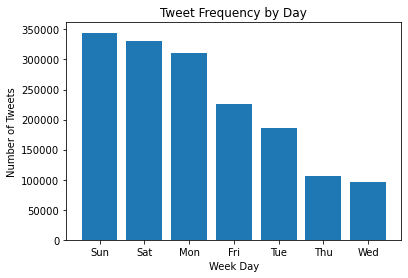

In [16]:
day_dist = df['day'].value_counts()

# title and labels
plt.ylabel('Number of Tweets')
plt.xlabel('Week Day')
plt.title('Tweet Frequency by Day')
plt.bar(day_dist.index, day_dist);

In [17]:
# investigating correlation between day and polarity of tweets
day_polarity = df.groupby(['day', 'polarity']).count()['id']

In [18]:
neg_day = []
pos_day = []
for i in range(0, len(day_polarity), 2):
    neg_day.append(day_polarity[i])
    pos_day.append(day_polarity[i+1])
print('Negative tweets', neg_day)
print('Positive tweets', pos_day)

Negative tweets [114600, 132539, 157734, 145471, 80132, 101051, 68473]
Positive tweets [110994, 177666, 173221, 199084, 25903, 84799, 28333]


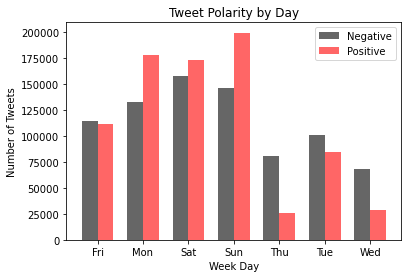

In [19]:
# graphing tweet numbers by week day
ind = np.arange(len(neg_day))  # the x locations for the groups
width = 0.35       # the width of the bars

# ploting bar chart
neg_bars = plt.bar(ind, neg_day, width, color='k', alpha=.6, label='Negative')
pos_bars = plt.bar(ind + width, pos_day, width, color='r', alpha=.6, label='Positive')

# title and labels
plt.ylabel('Number of Tweets')
plt.xlabel('Week Day')
plt.title('Tweet Polarity by Day')
locations_day = ind + width / 2  # xtick locations
labels_day = ['Fri', 'Mon', 'Sat', 'Sun', 'Thu', 'Tue', 'Wed']  # xtick labels
plt.xticks(locations_day, labels_day);

# legend
plt.legend();

#### Hours

In [20]:
# distribution of tweets in day hours
df['hour'].value_counts()

23    84750
07    83654
00    80865
06    80852
05    78623
22    78328
04    76995
08    76287
01    75268
03    74253
02    73991
21    68964
09    67278
11    61009
10    60689
19    57722
20    57059
16    55720
18    53485
17    51843
12    51653
15    50643
14    50380
13    49689
Name: hour, dtype: int64

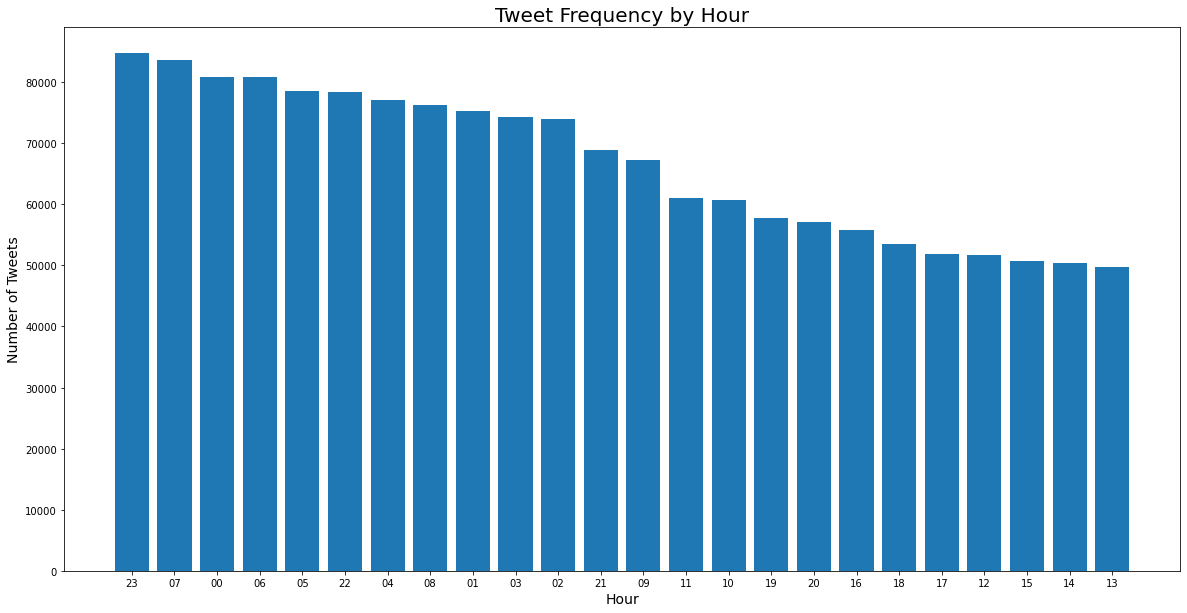

In [21]:
hour_dist = df['hour'].value_counts()

plt.figure(figsize=(20,10)) 

# title and labels
plt.ylabel('Number of Tweets', fontsize=14)
plt.xlabel('Hour', fontsize=14)
plt.title('Tweet Frequency by Hour', fontsize=20)


plt.bar(hour_dist.index, hour_dist);

In [22]:
# investigating relations between tween polarity and hour
hour_polarity = df.groupby(['hour', 'polarity']).count()['id']

In [23]:
neg_hour = []
pos_hour = []
for i in range(0, len(hour_polarity), 2):
    neg_hour.append(hour_polarity[i])
    pos_hour.append(hour_polarity[i+1])
print('Negative Tweets', neg_hour)
print('Positiver Tweets', pos_hour)

Negative Tweets [35582, 30581, 30171, 31717, 34946, 37774, 40076, 42208, 40166, 36511, 31597, 31336, 28120, 27449, 27077, 28531, 31594, 29316, 29422, 31193, 30102, 36007, 39018, 39506]
Positiver Tweets [45283, 44687, 43820, 42536, 42049, 40849, 40776, 41446, 36121, 30767, 29092, 29673, 23533, 22240, 23303, 22112, 24126, 22527, 24063, 26529, 26957, 32957, 39310, 45244]


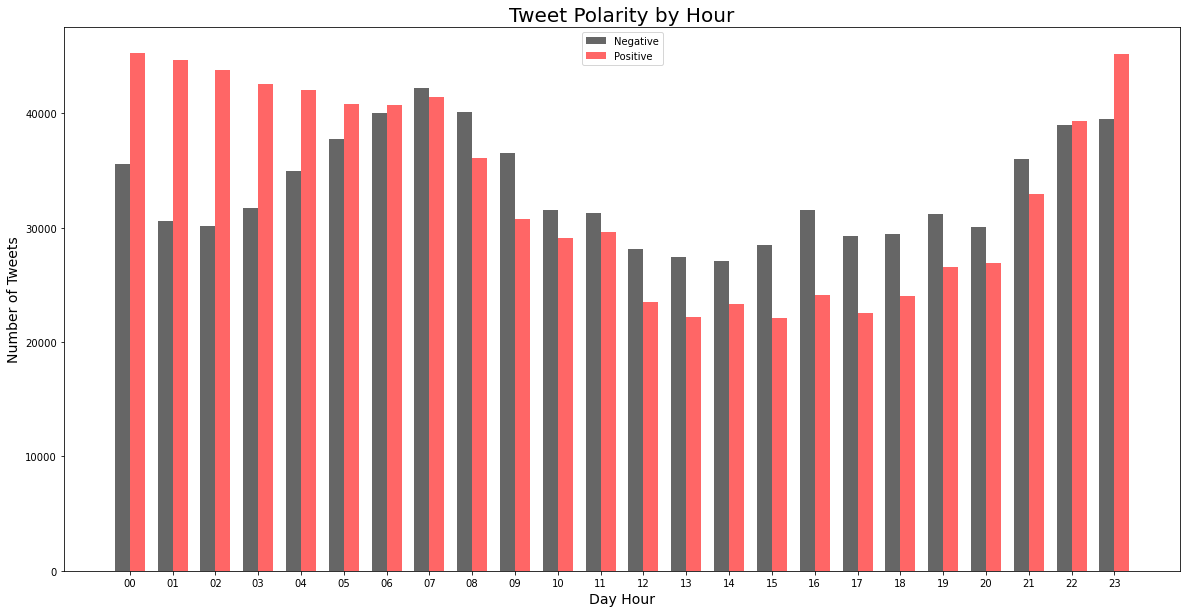

In [24]:
ind = np.arange(len(neg_hour))  # the x locations for the groups
width = 0.35       # the width of the bars

plt.figure(figsize=(20,10)) 

# ploting bar chart
neg_bars = plt.bar(ind, neg_hour, width, color='k', alpha=.6, label='Negative')
pos_bars = plt.bar(ind + width, pos_hour, width, color='r', alpha=.6, label='Positive')

# title and labels
plt.ylabel('Number of Tweets', fontsize=14)
plt.xlabel('Day Hour', fontsize=14)
plt.title('Tweet Polarity by Hour', fontdict={'fontsize':20})
locations_hours = ind + width / 2  # xtick locations
labels_hours = ['00', '01', '02', '03', '04', '05', '06',
          '07', '08', '09', '10', '11', '12', '13', '14', '15', '16', '17', '18', '19', '20', '21', '22', '23']  # xtick labels
plt.xticks(locations_hours, labels_hours);

# legend
plt.legend();

#### Minutes

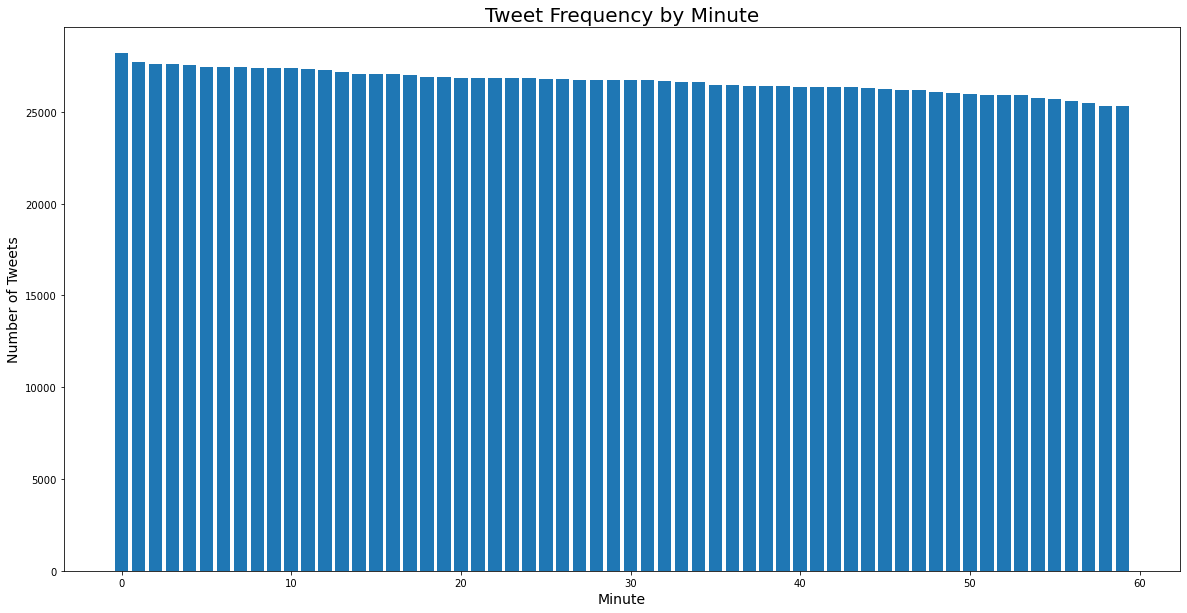

In [25]:
plt.figure(figsize=(20,10)) 
# title and labels
plt.ylabel('Number of Tweets', fontsize=14)
plt.xlabel('Minute', fontsize=14)
plt.title('Tweet Frequency by Minute', fontsize=20)
plt.bar([x for x in range(0,60)], df['min'].value_counts());

In [26]:
df.groupby(['min', 'polarity']).count()['id']

min  polarity
00   0           13884
     4           13001
01   0           13208
     4           14214
02   0           13287
                 ...  
57   4           13283
58   0           13498
     4           13422
59   0           13546
     4           13325
Name: id, Length: 120, dtype: int64

#### Seconds

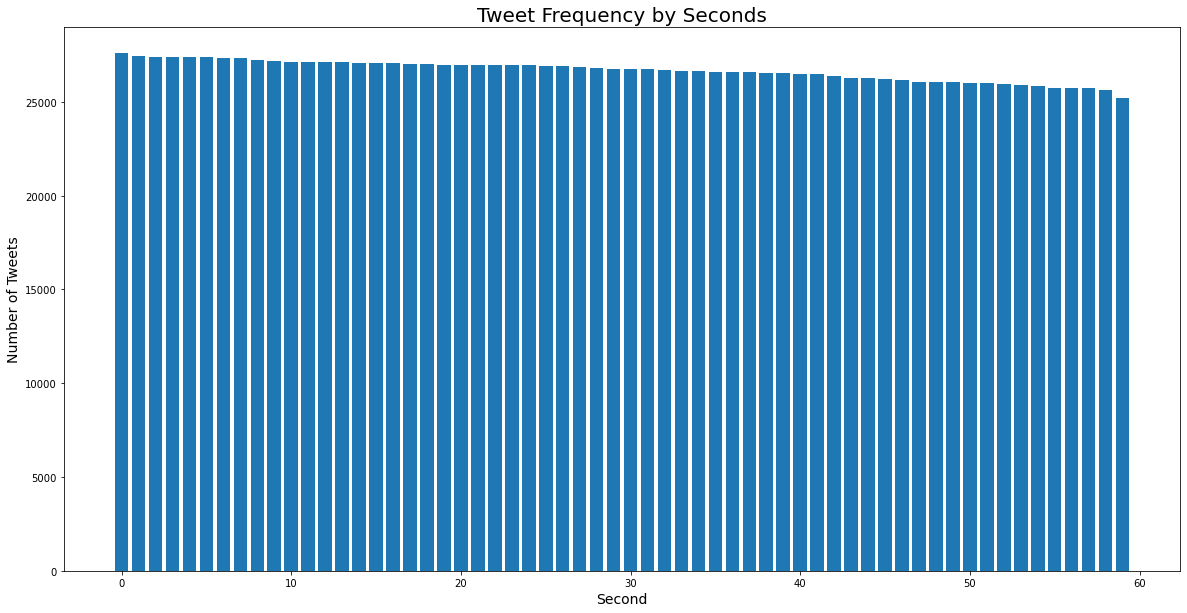

In [27]:
plt.figure(figsize=(20,10)) 
# title and labels
plt.ylabel('Number of Tweets', fontsize=14)
plt.xlabel('Second', fontsize=14)
plt.title('Tweet Frequency by Seconds', fontsize=20)
plt.bar([x for x in range(0,60)], df['sec'].value_counts());

In [28]:
df.groupby(['sec', 'polarity']).count()['id']

sec  polarity
00   0           13115
     4           12500
01   0           12807
     4           12403
02   0           13167
                 ...  
57   4           12821
58   0           13099
     4           12643
59   0           13099
     4           12620
Name: id, Length: 120, dtype: int64

### Query Analysis

In [29]:
# query distribution
df['query'].value_counts()

NO_QUERY    1600000
Name: query, dtype: int64

### Username Analysis

In [32]:
df.duplicated(subset=['userName']).sum()

940225

### Text Analysis

In [33]:
df['text'].duplicated().sum()

18534

# Preprocessing

### Removing Duplicates

In [34]:
# Drop tweets with the same ID totally without keeping any dublicate
df.drop_duplicates(subset=['id'], keep=False, inplace=True)

In [35]:
# Drop tweets with same text but with keeping one of them
df.drop_duplicates(subset=['text'], keep = False, inplace=True)

In [36]:
df.reset_index(inplace=True, drop=True)

### Dropping Unneeded Features

In [ ]:
df.drop(columns=['id', 'date', 'query', 'userName', 'sec', 'min', 'year', 'month'], inplace=True)

### Adjusting Polarity

In [39]:
# map polarity 4 to be polarity 1
df['polarity'].replace(4, 1, inplace=True)

### Text Preprocessing

In [40]:
#adding new contractions to the contractions list which is already here
# https://github.com/kootenpv/contractions/blob/master/contractions/data/contractions_dict.json
contractions.add('isnt', 'is not')
contractions.add('arent', 'are not')
contractions.add('doesnt', 'does not')
contractions.add('dont', 'do not')
contractions.add('didnt', 'did not')
contractions.add('cant', 'can not')
contractions.add('couldnt', 'could not')
contractions.add('hadnt', 'had not')
contractions.add('hasnt', 'has not')
contractions.add('havenot', 'have not')
contractions.add('shouldnt', 'should not')
contractions.add('wasnt', 'was not')
contractions.add('werent', 'were not')
contractions.add('wont', 'will not')
contractions.add('wouldnt', 'would not')
contractions.add('cannot', 'can not')
contractions.add('can\'t', 'can not')
contractions.add( "can't've", "can not have")

In [41]:
def preprocess(doc):
    doc = unidecode.unidecode(doc) # transliterates any unicode string into the closest possible representation in ascii text.
    doc = contractions.fix(doc) # expands contractions                   
    doc = re.sub('[\t\n]', ' ', doc) # remove newlines and tabs
    doc = re.sub(r'@[A-Za-z0-9_]+', '', doc) # remove mentions
    doc = re.sub(r'#[A-Za-z0-9_]+', '', doc) #remove hashtags
    doc = re.sub(r'https?://[^ ]+', '', doc)
    doc = re.sub(r'www.[^ ]+', '', doc)
    doc = re.sub('[^A-Za-z]+', ' ', doc) # remove all characters other than alphabet
    doc = re.sub(' +', ' ', doc) # substitute any number of space with one space only
    doc = doc.strip().lower() # remove spaces from begining and end and lower the text
    return doc

### Initial Processing

In [42]:
# Apply preprocessing for data
df['processed'] = df['text'].apply(preprocess)

In [43]:
df['processed'].duplicated().sum() # remove them to reduce time of stemming (next step)

60837

In [44]:
df.drop_duplicates(subset=['processed'], inplace=True)
df.reset_index(inplace=True, drop=True)

### Tokenizing the words

In [45]:
# Tokenizing the words using spaces
df['segmented'] = df['processed'].apply(lambda x: x.split()) 

### Lemmatizing the words

In [46]:
from nltk.corpus import wordnet
# Map pos tag from nltk library to characeters accepted by the wordnet Lemmatizer to understand word's POS 
def get_wordnet_pos(word): 
    tag = nltk.pos_tag([word])[0][1][0].upper()
    tag_dict = {"J": wordnet.ADJ,
                "N": wordnet.NOUN,
                "V": wordnet.VERB,
                "R": wordnet.ADV}

    return tag_dict.get(tag, wordnet.NOUN)

In [47]:
from nltk.stem import WordNetLemmatizer
# Lemmatize all words in a list of words using their POS
def lemmatizerHelper(words):
    lemmatizer = WordNetLemmatizer()
    l = []
    for w in words:
        l.append(lemmatizer.lemmatize(w , get_wordnet_pos(w)))
    return l
    

In [48]:
df['stemmed'] = df['segmented'].apply(lemmatizerHelper) # stemming the words

In [112]:
from nltk.stem import WordNetLemmatizer
lemmatizer = WordNetLemmatizer()

### Frequency Analysis Before Removing Stop Words

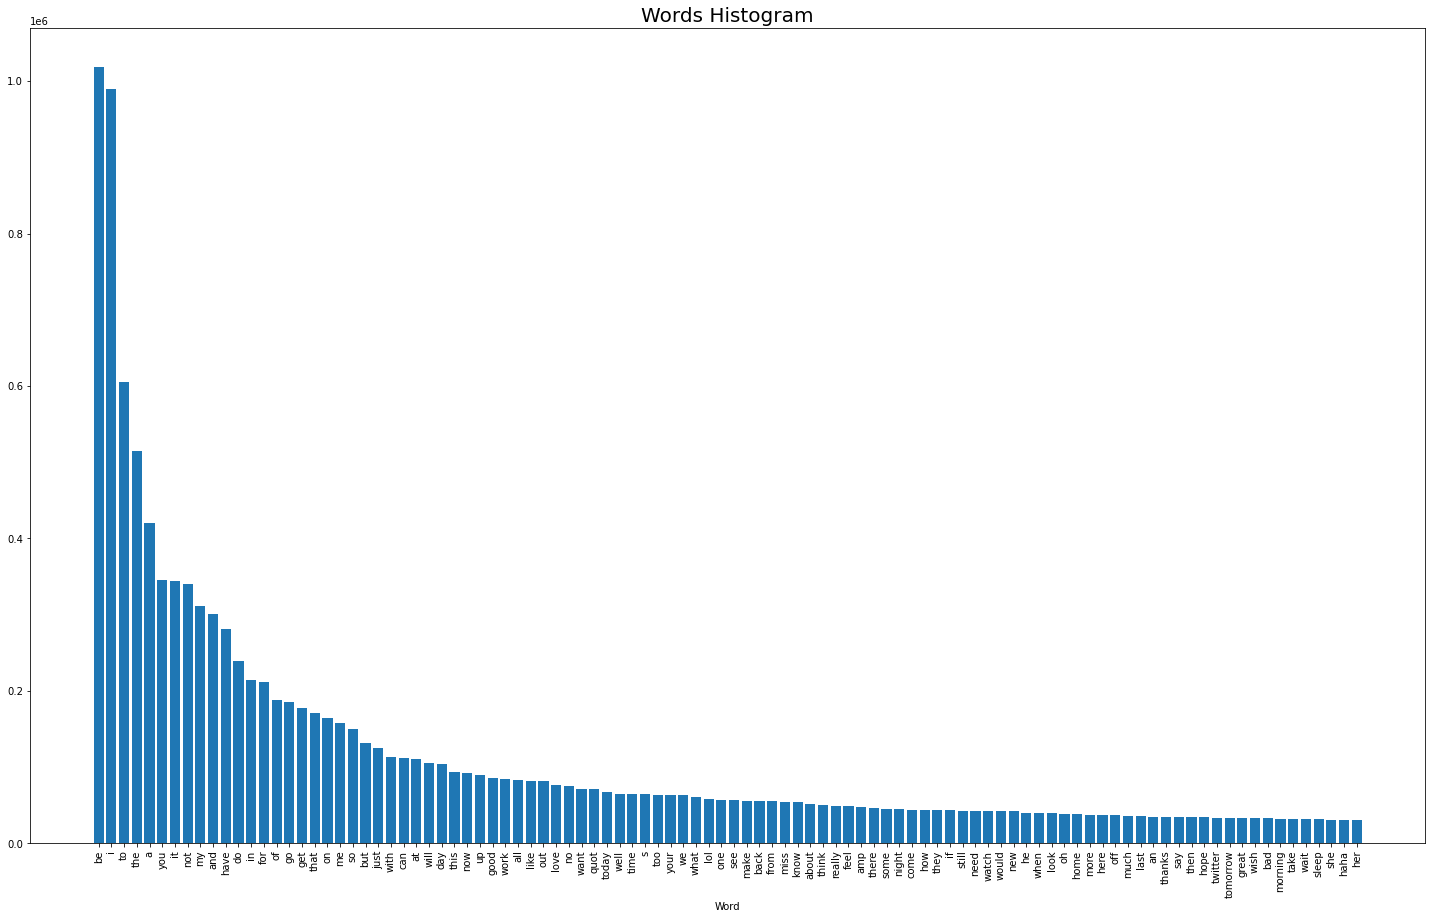

In [49]:
from nltk.probability import FreqDist

fdist = FreqDist()
for vec in df['stemmed']:
    for word in vec:
        fdist[word.lower()] += 1

highest = dict(fdist.most_common(100))

plt.figure(figsize=(25,15)) 
plt.title('Words Histogram', fontdict={'fontsize':20})
plt.xlabel('Word')
plt.bar(highest.keys(), highest.values())
plt.xticks(rotation=90)
plt.show()

In [50]:
from string import ascii_lowercase

stop_words = set(nltk.corpus.stopwords.words('english'))
exclude_words = set(("not", "no"))
new_stop_words = stop_words.difference(exclude_words)

# adding single characters to new_stop_words
for c in ascii_lowercase:
    new_stop_words.add(c)

In [51]:
# Remove stopwords except "not", "no" from tokenized words
df['stopRemoved'] = df['stemmed'].apply(lambda words: [word for word in words if word not in new_stop_words])

In [52]:
negationWords = ['not', 'no', 'never']

# A function that replaces negationWords in a tokenized array with not concatenated with the next nonNegation word (bigram but conctenated)
# for example ['never', no', 'not', 'happy', 'journey'] will be ['nothappy', 'jo']
def bigramNegationWords(words):
    l = []
    metNegation = False
    bigram = ''
    for w in words:
        if w in negationWords:
            if metNegation == False:
                bigram += 'not'
                metNegation = True
            else:
                continue
        else:
            if metNegation == True:
                bigram += w
                l.append(bigram)
                metNegation = False
                bigram = ''
            else:
                l.append(w)
    return l


In [53]:
 df['negated'] = df['stopRemoved'].apply(bigramNegationWords)

### Frequency Analysis After Removing Stop Words

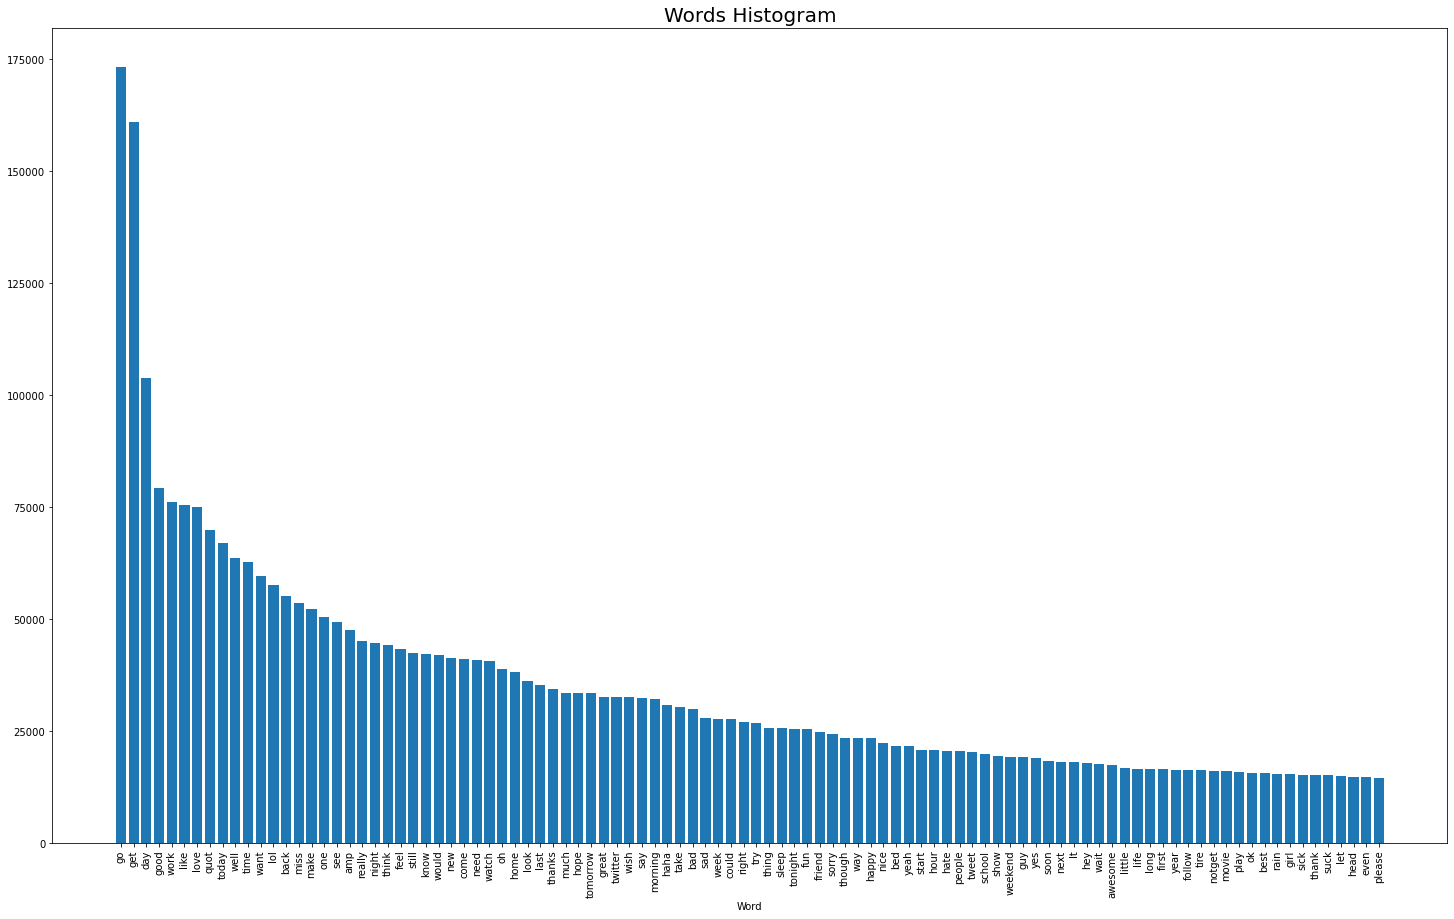

In [54]:
from nltk.probability import FreqDist

fdist = FreqDist()
for vec in df['negated']:
    for word in vec:
        fdist[word.lower()] += 1

higestStopRem = dict(fdist.most_common(100))

plt.figure(figsize=(25,15)) 
plt.title('Words Histogram', fontdict={'fontsize':20})
plt.xlabel('Word')
plt.bar(higestStopRem.keys(), higestStopRem.values())
plt.xticks(rotation=90)
plt.show()

In [55]:
# Number of unique words in the data
len(fdist)

260778

In [56]:
from statistics import *
# Mean and Median => The graph is right skewed
print('Mean:', mean(fdist.values()))
print('Median:', median(fdist.values()))

Mean: 40.4375254047504
Median: 1.0


### Removing least frequency words

In [57]:
# Number of words with freq >100
len([x for x in fdist.values() if x >= 100])

7119

In [58]:
# Putting high frequency non stop words in a list usefulWords
usefulWords = []
for word in fdist:
    if fdist[word] >= 100 and len(word)>2:
        usefulWords.append(word)
len(usefulWords)

6837

In [59]:
usefulWords.append('oh')
usefulWords.append('aw')
usefulWords.append('ok')
usefulWords.append('hi')

In [60]:
# Removing some frequent meaningless words (We already removed most frequent in the stopwords step)
usefulWords.remove('get')
usefulWords.remove('day')
usefulWords

['good',
 'work',
 'like',
 'love',
 'quot',
 'today',
 'well',
 'time',
 'want',
 'lol',
 'back',
 'miss',
 'make',
 'one',
 'see',
 'amp',
 'really',
 'night',
 'think',
 'feel',
 'still',
 'know',
 'would',
 'new',
 'come',
 'need',
 'watch',
 'home',
 'look',
 'last',
 'thanks',
 'much',
 'hope',
 'tomorrow',
 'great',
 'twitter',
 'wish',
 'say',
 'morning',
 'haha',
 'take',
 'bad',
 'sad',
 'week',
 'could',
 'right',
 'try',
 'thing',
 'sleep',
 'tonight',
 'fun',
 'friend',
 'sorry',
 'though',
 'way',
 'happy',
 'nice',
 'bed',
 'yeah',
 'start',
 'hour',
 'hate',
 'people',
 'tweet',
 'school',
 'show',
 'weekend',
 'guy',
 'yes',
 'soon',
 'next',
 'hey',
 'wait',
 'awesome',
 'little',
 'life',
 'long',
 'first',
 'year',
 'follow',
 'tire',
 'notget',
 'movie',
 'play',
 'best',
 'rain',
 'girl',
 'sick',
 'thank',
 'suck',
 'let',
 'head',
 'even',
 'please',
 'use',
 'call',
 'notwait',
 'always',
 'everyone',
 'give',
 'already',
 'lot',
 'something',
 'another',
 'kee

In [61]:
# Remove less frequent words
def remLessFreq(x):
    ll = []
    for word in x:
        if word in usefulWords:
            ll.append(word)
    return ll

In [62]:
df['cleaned'] = df['negated'].apply(remLessFreq)

In [63]:
df['cleaned'] = df['cleaned'].apply(lambda x: np.nan if len(x) == 0 else x)

In [64]:
# Size before dropping empty values
df.shape

(1512197, 10)

In [65]:
df.dropna(inplace=True)

In [66]:
# Size After dropping empty
df.shape

(1496338, 10)

## Feature Generation

### Words

In [67]:
def convToDict(words):
    freq= dict()
    for word in words:
        if word in freq:
            freq[word] +=1
        else:
            freq[word] = 1
    return freq

In [68]:
df['words'] = df['cleaned'].apply(convToDict)

In [69]:
df.to_csv("beforeDropping.csv", index=False)

In [70]:
df.drop(columns=['text', 'processed','segmented', 'stemmed', 'stopRemoved', 'negated', 'cleaned'], inplace=True)

### Days

In [71]:
# one hot encoding for week
days_encoded = pd.get_dummies(df['day'])
days_encoded.head()

,Fri,Mon,Sat,Sun,Thu,Tue,Wed
0,0,1,0,0,0,0,0
1,0,1,0,0,0,0,0
2,0,1,0,0,0,0,0
3,0,1,0,0,0,0,0
4,0,1,0,0,0,0,0


### Hours

In [72]:
hours_encoded = pd.get_dummies(df['hour'], prefix ='h')
hours_encoded.head()

,h_00,h_01,h_02,h_03,h_04,h_05,h_06,h_07,h_08,h_09,...,h_14,h_15,h_16,h_17,h_18,h_19,h_20,h_21,h_22,h_23
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0


In [75]:
final_df = df.join(days_encoded).join(hours_encoded)

In [76]:
final_df.drop(columns=['day','hour'], inplace=True)

In [77]:
final_df.to_csv("final_df.csv", index=False)

In [132]:
final_df.head()

,polarity,words,Fri,Mon,Sat,Sun,Thu,Tue,Wed,h_00,...,h_14,h_15,h_16,h_17,h_18,h_19,h_20,h_21,h_22,h_23
0,0,"{'awww': 1, 'bummer': 1, 'shoulda': 1, 'david'...",0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
1,0,"{'upset': 1, 'notupdate': 1, 'facebook': 1, 't...",0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
2,0,"{'dive': 1, 'many': 1, 'time': 1, 'ball': 1, '...",0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
3,0,"{'whole': 1, 'body': 1, 'feel': 1, 'itchy': 1,...",0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
4,0,"{'mad': 1, 'notsee': 1}",0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0


## Final Metrics

### Data SIze

In [144]:
# Final Shape
final_df.shape

(1496338, 33)

### Polarity Distribuiton

In [135]:
final_df['polarity'].value_counts()

0    755121
1    741217
Name: polarity, dtype: int64

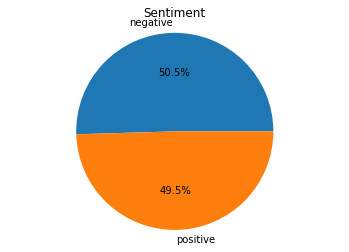

In [142]:
import matplotlib.pyplot as plt

plt.pie(x=[755121, 741217],labels=['negative', 'positive'],autopct='%1.1f%%')
plt.title('Sentiment')
plt.axis('equal')
plt.show()

### Unique Words

In [152]:
unique_words = set()
for words in final_df['words']:
    for w in words:
        unique_words.add(w)
len(unique_words)

6839